In [32]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#本题目要研究有哪些因素会让船上的人生还率更高？
#项目分为三个步骤开展
#1.了解数据集的信息和基本情况
#2.通过单变量与多变量探索来了解哪些因素影响船上乘客的生还率

In [2]:
data=pd.read_csv('titanic_data.csv')
#读取文件

In [3]:
data.values

array([[1L, 0L, 3L, ..., 7.25, nan, 'S'],
       [2L, 1L, 1L, ..., 71.2833, 'C85', 'C'],
       [3L, 1L, 3L, ..., 7.925, nan, 'S'],
       ..., 
       [889L, 0L, 3L, ..., 23.45, nan, 'S'],
       [890L, 1L, 1L, ..., 30.0, 'C148', 'C'],
       [891L, 0L, 3L, ..., 7.75, nan, 'Q']], dtype=object)

In [4]:
data.info 
#数据集共有12个字段，PassengerId：乘客编号，Survived：乘客存活情况，Pclass：乘客船舱等级；Name：乘客姓名，Sex：乘客性别，Age：乘客年龄，SibSp：乘客的兄弟姐妹和配偶数量，Parch：乘客的父母与子女数量，Ticket：票的编号，Fare：票价，Cabin：座位号，Embarked：乘客登船码头

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25  

In [5]:
data.describe()
#获取数据集自变量的基本统计值，共有891位乘客的信息

C:\Users\Administrator\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
print(data.isnull().sum())
#对数据集自变量缺失值的情况进行计数，有277位乘客年龄数据缺失，2位乘客登船码头数据缺失，687位乘客船舱数据缺失

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
fig,ax = plt.subplots(figsize=(5,5))
data["Survived"].value_counts().plot(kind="bar")
ax.set_xticklabels(("Not Survived","Survived"),rotation= "horizontal")
ax.set_title("Bar Chart of Survived")
#对数据集中乘客生还情况作直方图统计。未生还的占多数

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
data["Sex"].value_counts().plot(kind="bar")
ax.set_xticklabels(("Male","Female"),rotation= "horizontal")
ax.set_title("Bar Chart of Sex")
#对数据集中乘客性别情况作直方图统计，数据集的乘客中男性占多数

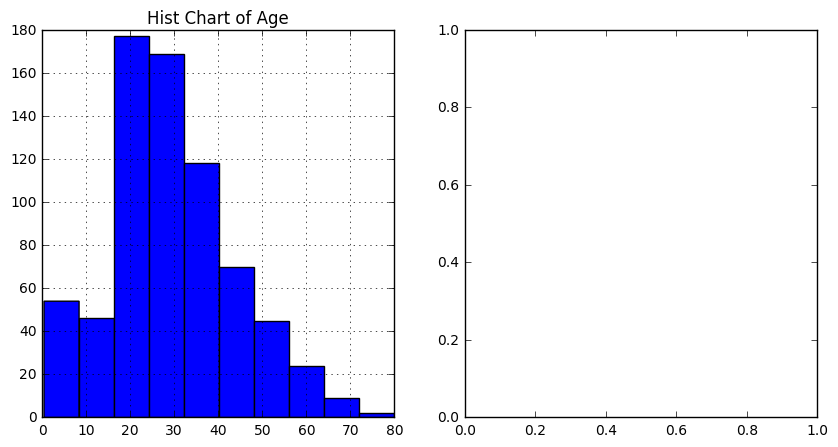

In [9]:
%matplotlib inline
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
data["Age"].hist(ax=ax[0])
ax[0].set_title("Hist Chart of Age")
#对数据集中乘客年龄分布作直方图统计。乘客年龄在30-40岁的最多，年龄在20-40岁之间的乘客占数据集的半数以上；

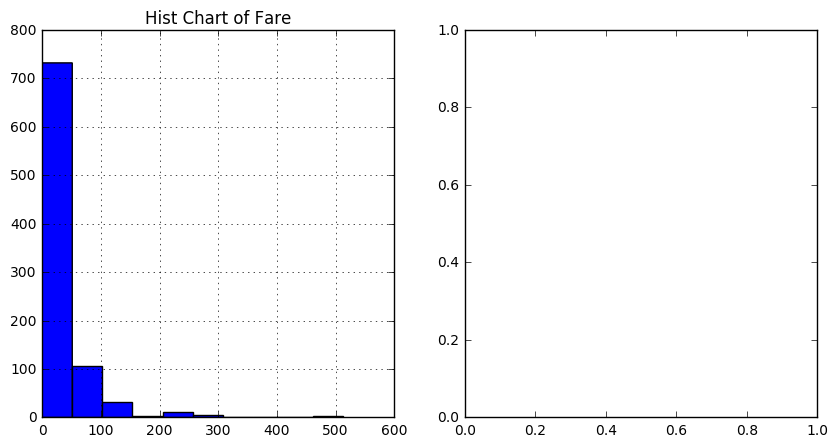

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
data["Fare"].hist(ax=ax[0])
ax[0].set_title("Hist Chart of Fare")
#对数据集中船票价格的分布作直方图统计大部分乘客都是0-100之间的最低票价，只有少部分乘客是较高票价的票

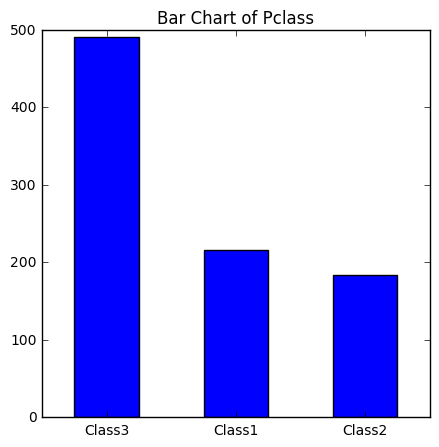

In [11]:
fig,ax = plt.subplots(figsize=(5,5))
data["Pclass"].value_counts().plot(kind="bar")
ax.set_xticklabels(("Class3","Class1","Class2"),rotation= "horizontal"  )
ax.set_title("Bar Chart of Pclass")
#对数据集中乘客船舱等级情况作直方图统计，大部分是3等舱，和票价情况吻合

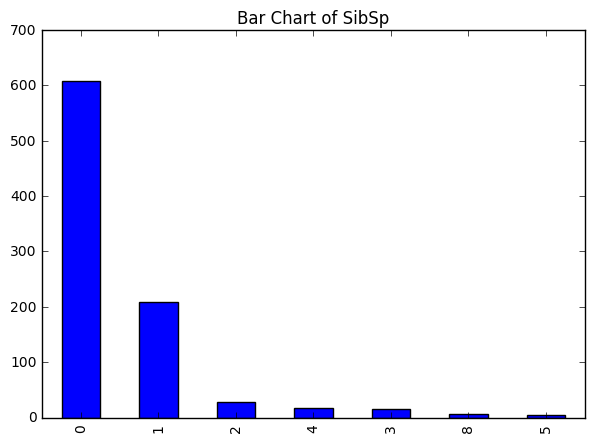

In [12]:
fig,ax = plt.subplots(figsize=(7,5))
data["SibSp"].value_counts().plot(kind="bar")
ax.set_title("Bar Chart of SibSp")
#对数据集中乘客在船上的兄弟姐妹及配偶数量情况作直方图统计，在船上有兄弟姐妹或配偶的乘客较少，约200名乘客有1名兄弟姐妹或配偶

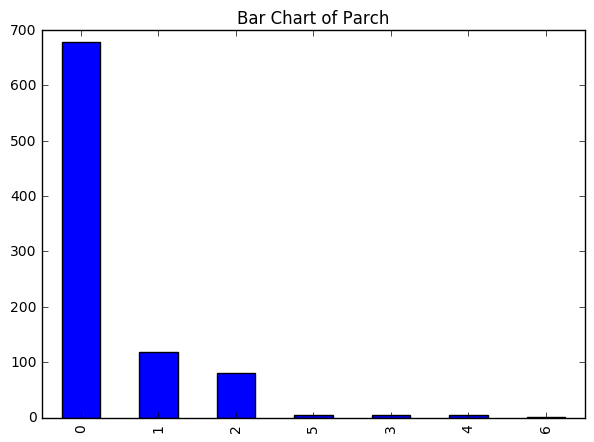

In [13]:
fig,ax = plt.subplots(figsize=(7,5))
data["Parch"].value_counts().plot(kind="bar")
ax.set_title("Bar Chart of Parch")
#对数据集中乘客在船上的父母及子女数量情况作直方图统计，在船上有父母或子女的乘客较少，约110名乘客有1名父母或子女，约90名乘客有2名父母或子女

In [14]:
data.Cabin.fillna("Unknown",inplace=True)
for i in range(0, 891):
    data.Cabin[i]= data.Cabin[i][0]
    #对数据集中的乘客座位号数据进行处理，将缺失值赋值为Unknown。乘客座位号第一个字母可能代表了船舱号码，将该字符提取出来，赋值给Cabin，视为船舱号。

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


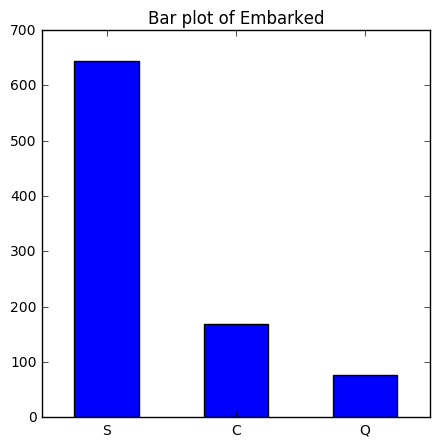

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
data["Embarked"].value_counts().plot(kind="bar")
ax.set_xticklabels(("S","C","Q"),rotation= "horizontal")
ax.set_title("Bar plot of Embarked")
#对数据集中乘客出发港口情况作直方图统计，大部分乘客从S港口出发，约180位乘客从C港口出发，不到100位乘客从Q港口出发。

In [16]:
pd.crosstab(data["Sex"],data["Survived"])
#对数据集乘客性别与生还情况进行交叉分析，做数据表和条形图，发现数据集中女性生还率远大于男性。

Survived,0,1
Sex,,
female,81,233
male,468,109


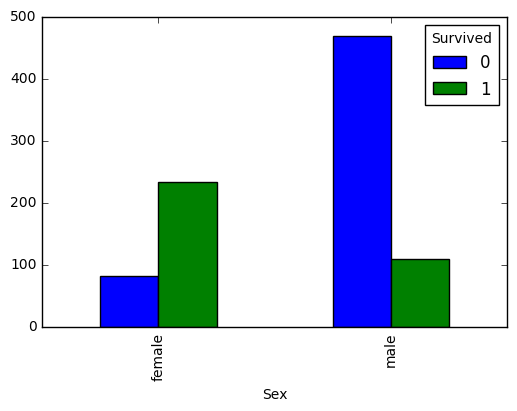

In [17]:
pd.crosstab(data["Sex"],data["Survived"]).plot(kind="bar")

In [18]:
pd.crosstab(data["Pclass"],data["Survived"])
#对数据集乘客船舱等级与生还情况进行交叉分析，做数据表和条形图，发现数据集中一等舱有超过50%的乘客生还，二等舱有接近50%乘客生还，而三等舱生还率很低

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


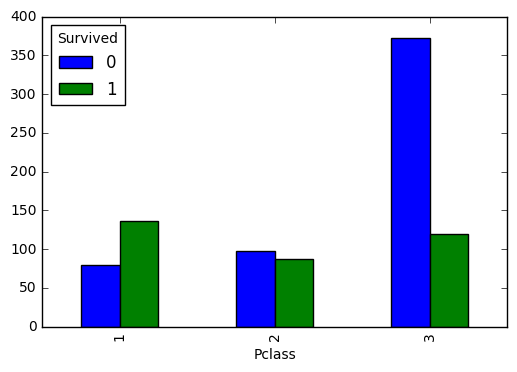

In [19]:
pd.crosstab(data["Pclass"],data["Survived"]).plot(kind="bar")

In [20]:
pd.crosstab(data["SibSp"],data["Survived"])
#对数据集乘客的兄弟姐妹及配偶数目情况与生还情况进行交叉分析，做数据表和条形图，
#发现数据集中有1名兄弟姐妹或配偶的乘客生还率大于50%，数据集中有2名兄弟姐妹或配偶的乘客生还率接近50%

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


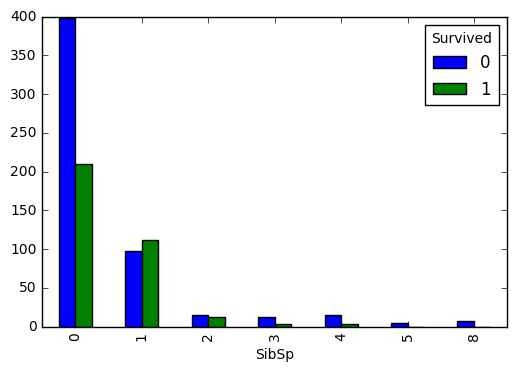

In [21]:
pd.crosstab(data["SibSp"],data["Survived"]).plot(kind="bar")

In [22]:
pd.crosstab(data["Parch"],data["Survived"])
#对数据集乘客的父母或子女数目情况与生还情况进行交叉分析，做数据表和条形图，
#发现数据集中有1名父母或子女的乘客生还率大于50%，数据集中有2名父母或子女的乘客生还率接近50%

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


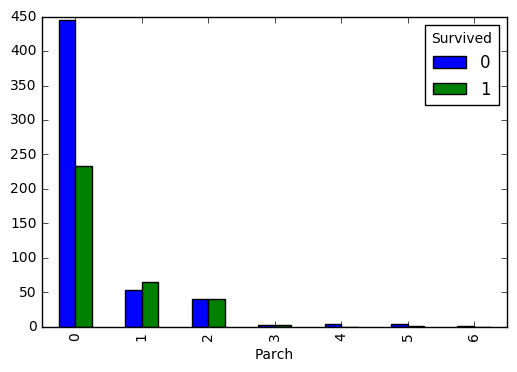

In [23]:
pd.crosstab(data["Parch"],data["Survived"]).plot(kind="bar")

In [24]:
pd.crosstab(data["Embarked"],data["Survived"])
#对数据集乘客的出发港口情况与生还情况进行交叉分析，做数据表和条形图，发现数据集中从C港口出发的乘客生还率较高

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


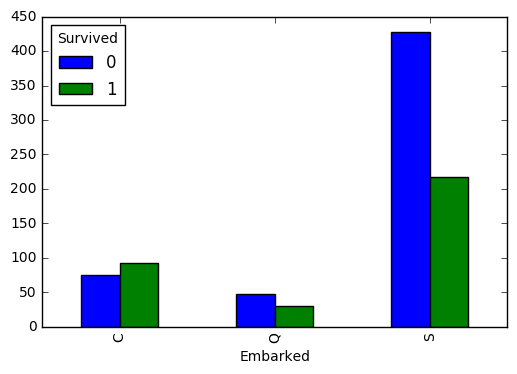

In [25]:
pd.crosstab(data["Embarked"],data["Survived"]).plot(kind="bar")

In [26]:
pd.crosstab(data["Cabin"],data["Survived"])
#对数据集乘客的座位号情况与生还情况进行交叉分析，做数据表和条形图，发现数据集中有座位号的乘客生还率较高，推测较高等级的船舱才会给乘客分配有座位号

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
U,481,206


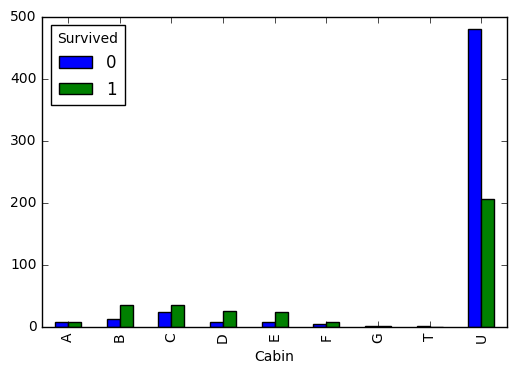

In [27]:
pd.crosstab(data["Cabin"],data["Survived"]).plot(kind="bar")

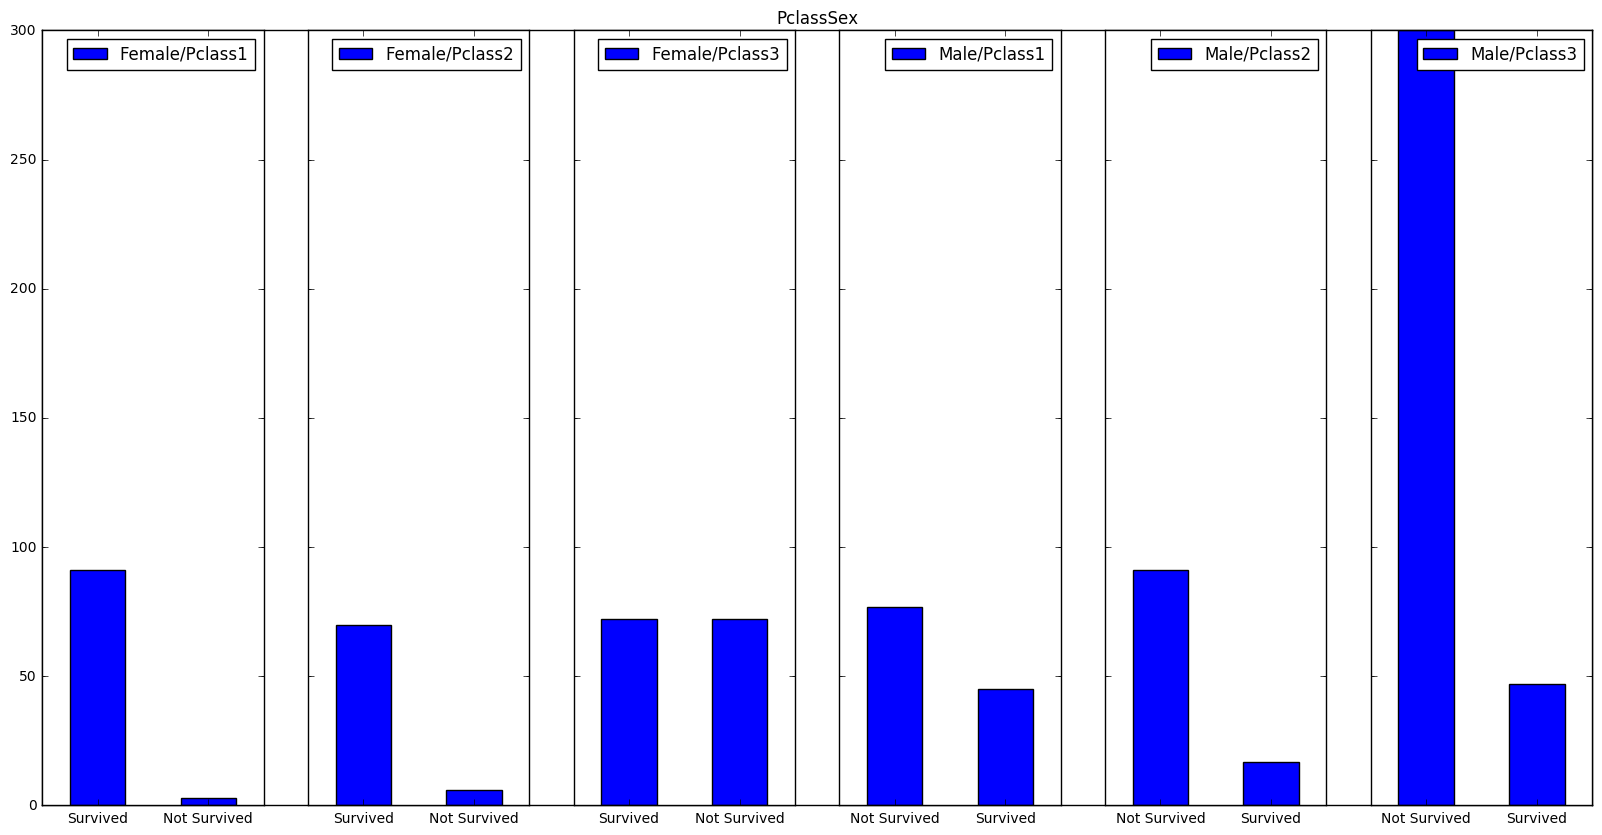

In [33]:
fig,ax = plt.subplots(figsize=(20,10))
fig.set() 
ax.set_xticks([]) 
ax.set_yticks([])
plt.title(u"PclassSex")

ax1=fig.add_subplot(161)
data.Survived[data.Sex == 'female'][data.Pclass == 1].value_counts().plot(kind='bar', label="female, highclass")
ax1.set_xticklabels([u"Survived", u"Not Survived"], rotation=0)
ax1.legend([u"Female/Pclass1"], loc='best')

ax2=fig.add_subplot(162, sharey=ax1)
data.Survived[data.Sex == 'female'][data.Pclass == 2].value_counts().plot(kind='bar', label="female, highclass")
ax2.set_xticklabels([u"Survived", u"Not Survived"], rotation=0)
plt.legend([u"Female/Pclass2"], loc='best')

ax3=fig.add_subplot(163, sharey=ax1)
data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts().plot(kind='bar', label="female, low class")
ax3.set_xticklabels([u"Survived", u"Not Survived"], rotation=0)
plt.legend([u"Female/Pclass3"], loc='best')

ax4=fig.add_subplot(164, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 1].value_counts().plot(kind='bar', label="male, high class")
ax4.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
plt.legend([u"Male/Pclass1"], loc='best')

ax5=fig.add_subplot(165, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 2].value_counts().plot(kind='bar', label="male, high class")
ax5.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
plt.legend([u"Male/Pclass2"], loc='best')

ax6=fig.add_subplot(166, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts().plot(kind='bar', label="male low class")
ax6.set_xticklabels([u"Not Survived", u"Survived"], rotation=0)
plt.legend([u"Male/Pclass3"], loc='best')

plt.show()
#作直方图观察船舱等级和性别两个因素对生还情况的影响，照应了前面的验证。
#船舱等级和性别对生还率影响明显，越高等级的船舱生还越高，女性比男性生还率高，

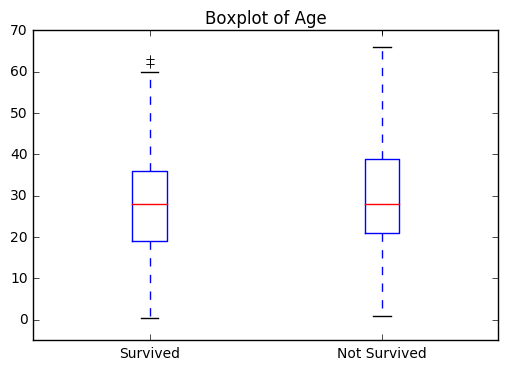

In [29]:
fig,ay = plt.subplots()
Age1 = data.Age[data.Survived == 1].dropna()
Age0 = data.Age[data.Survived == 0].dropna()
plt.boxplot((Age1,Age0),labels=('Survived','Not Survived'))
ay.set_ylim([-5,70])
ay.set_title("Boxplot of Age")
#用箱线图观察生还情况和乘客年龄的关系，可以发现年龄对生还率没有明显影响

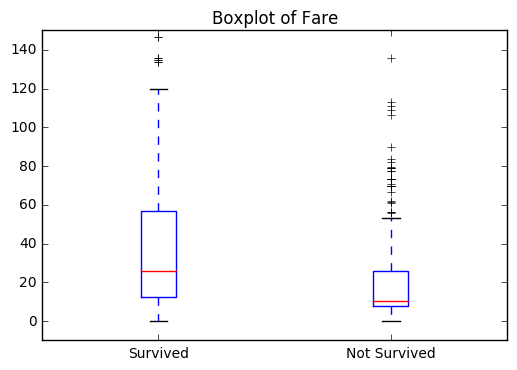

In [30]:
fig,ay = plt.subplots()
Fare1 = data.Fare[data.Survived == 1]
Fare0 = data.Fare[data.Survived == 0]
plt.boxplot((Fare1,Fare0),labels=('Survived','Not Survived'))
ay.set_ylim([-10,150])
ay.set_title("Boxplot of Fare")
#用箱线图观察船票价格情况和生还情况的关系，可以发现船票价格高的比船票价格低的乘客生还率更高

In [ ]:
#结论：根据上述分析，从数据集中这891位乘客的生还情况来看，乘客性别，船舱等级，子女数目，兄弟姐妹数目和出发港口这几个因素对生还率有影响
#1.数据集中女性乘客生还率高于男性乘客
#2.数据集中高等级船舱的乘客生还率高于低等级船舱的乘客生还率
#3.数据集中有1名或2名兄弟姐妹或配偶的乘客生还率较高
#4.数据集中有1名或2名子女的乘客生还率较高
#5.数据集中有从C岗出发的乘客生还率较高

#参考资料：
#http://blog.csdn.net/yywan1314520/article/details/50818471
#http://www.cnblogs.com/Lipp/articles/3287917.html